In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

In [2]:
data = np.loadtxt('artificial1d.csv', delimiter=',')
x = data[:, 0]
y = data[:, 1]

In [3]:
def ols(x, y, l2=0):
    n = len(y)
    x_mat = np.c_[np.ones(n), x]
    I = np.eye(len(x_mat.T @ x_mat))
    w = np.linalg.solve(x_mat.T @ x_mat + l2*I, x_mat.T @ y)
    y_pred = x_mat @ w
    mse = ((((y - y_pred)**2).sum())/(2*n))
    return w, mse

In [4]:
w, mse = ols(x,y)
print(f'w0 = {w[0]} / w1 = {w[1]}')
print(f'Erro quadrático mínimo = {mse}')

w0 = 0.06761792463834032 / w1 = 1.5748651690368318
Erro quadrático mínimo = 0.10670045066468496


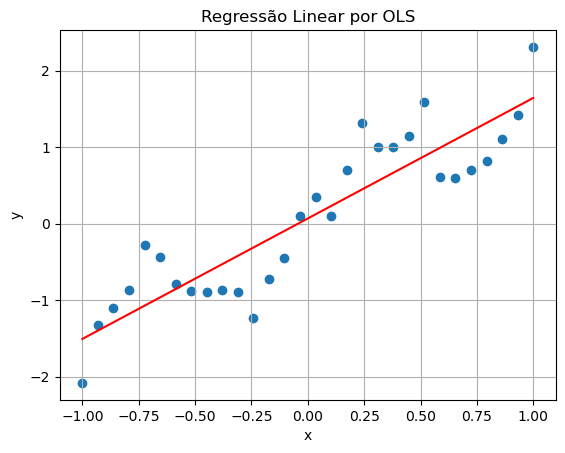

In [5]:
fig, ax = plt.subplots()
ax.scatter(x, y)
x_ = np.linspace(x.min(), x.max())
y_pred = w[0] + w[1]*x_
ax.plot(x_, y_pred, color = 'red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Regressão Linear por OLS')
plt.grid(True)
plt.show()

In [6]:
def gd(x, y, alpha=0.1, epochs=600):
    mse_values = []
    x = np.c_[np.ones((x.shape[0], 1)), x.reshape(-1, 1)]
    w = np.ones(x.shape[1])
    
    for _ in range(epochs):
        y_pred = x @ w
        e = y - y_pred
        w[0] += alpha * (1 / x.shape[0]) * e.sum()
        for i in range(1, len(w)):
            w[i] += alpha * (1 / x.shape[0]) * (e * x[:, i]).sum()
        
        mse = ((e ** 2).sum()) / x.shape[0]
        mse_values.append(mse)
    
    return w, mse_values, y_pred
       
w, mse_values, y_pred = gd(x, y)
print(f'w0 = {w[0]} / w1 = {w[1]}')
print(f'Erro quadrático mínimo = {mse_values[-1]}')

w0 = 0.06761792463834031 / w1 = 1.5748651688349056
Erro quadrático mínimo = 0.21340090132936992


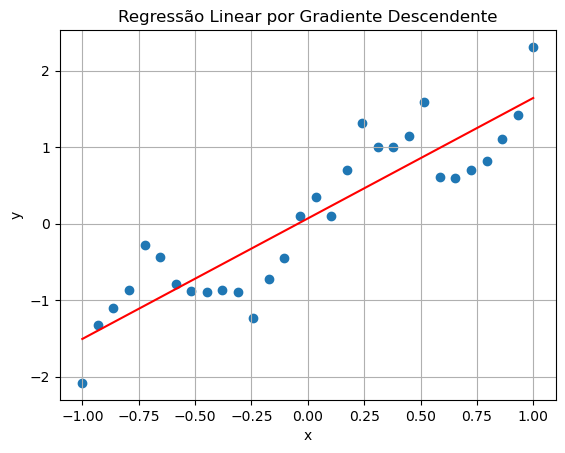

In [7]:
fig, ax = plt.subplots()
ax.scatter(x, y)
x_ = np.linspace(x.min(), x.max())
y_pred = w[0] + w[1]*x_
ax.plot(x_, y_pred, color = 'red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Regressão Linear por Gradiente Descendente')
plt.grid(True)
plt.show()

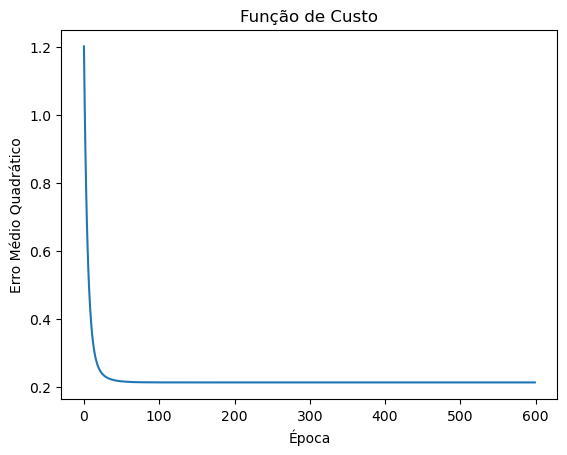

In [8]:
plt.plot(range(600), mse_values)
plt.xlabel('Época')
plt.ylabel('Erro Médio Quadrático')
plt.title('Função de Custo')
plt.show()

In [9]:
def sgd(x, y, alpha=0.01, epochs=600):
    x = np.c_[np.ones((x.shape[0], 1)), x.reshape(-1, 1)]  # Adicionar o termo de bias
    w = np.ones(x.shape[1])
    mse_values = []
    m = len(y)
    
    for _ in range(epochs):
        idx = np.random.permutation(m)
        for i in idx:
            y_pred = x[i] @ w
            e = y[i] - y_pred
            w[0] = w[0] + alpha * e
            for j in range(1, len(w)):
                w[j] = w[j] + alpha * e * x[i, j]
        
        y_pred_all = x @ w
        mse = ((y - y_pred_all) ** 2).mean()
        mse_values.append(mse)
    
    return w, mse_values
mse_values = []
w, mse_values = sgd(x, y)
print(f'w0 = {w[0]} / w1 = {w[1]}')
print(f'Erro quadrático mínimo = {mse}')

w0 = 0.06525370749389452 / w1 = 1.572536052322321
Erro quadrático mínimo = 0.10670045066468496


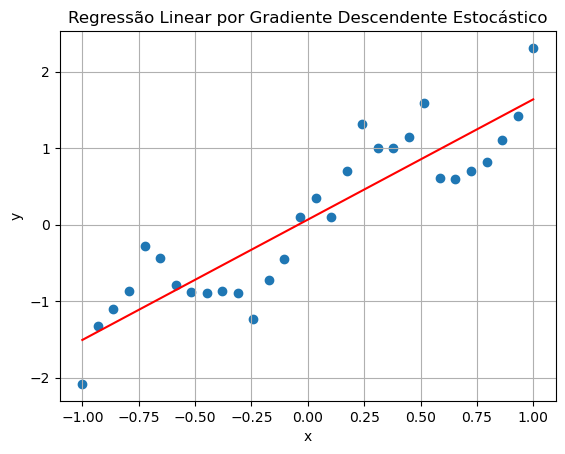

In [10]:
fig, ax = plt.subplots()
ax.scatter(x, y)
x_ = np.linspace(x.min(), x.max())
y_pred = w[0] + w[1]*x_
ax.plot(x_, y_pred, color = 'red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Regressão Linear por Gradiente Descendente Estocástico')
plt.grid(True)
plt.show()

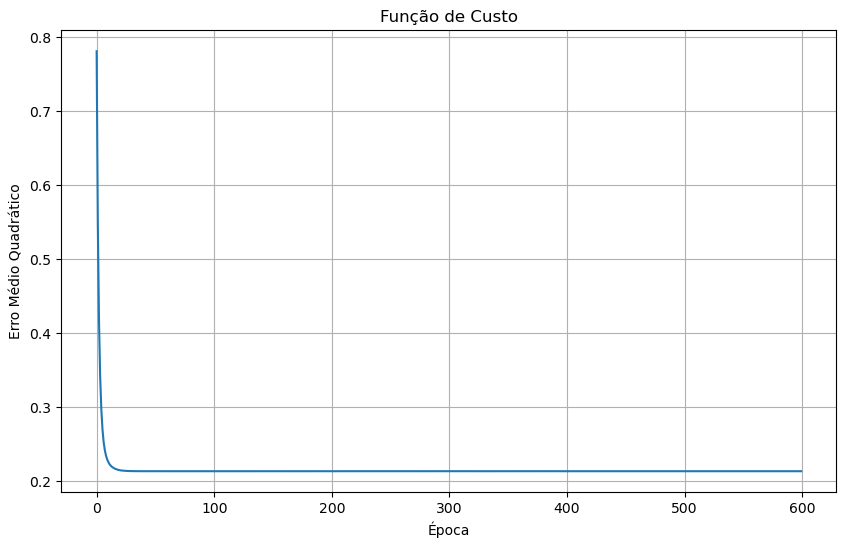

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(mse_values)
plt.xlabel('Época')
plt.ylabel('Erro Médio Quadrático')
plt.title('Função de Custo')
plt.grid(True)
plt.show()

In [12]:
data = pd.read_csv('california.csv')
x = data.iloc[:,:-1].values
y = (data.iloc[:,-1].values).reshape(-1,1)

RMSE de treino:
[1.11436048e+01 1.11436080e+01 1.38381325e+03 1.38381325e+03
 1.71841929e+05 1.71841929e+05 2.13393307e+07 2.13393307e+07
 2.64991809e+09 2.64991809e+09 3.29066828e+11 3.29066828e+11
 4.08635187e+13]
RMSE de teste:
[7.76009957e-01 8.25530290e-01 6.24781852e+01 1.51276520e+02
 6.77514242e+06 2.06483092e+07 9.89371588e+11 3.07493998e+12
 1.46611890e+17 4.51084698e+17 2.13425829e+22 6.54600989e+22
 3.10120458e+27]


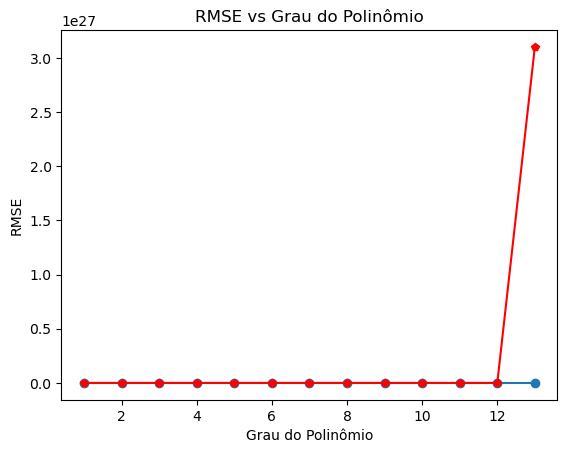

In [13]:
def train_test_split(x, y, test_percent=0.2):
    n = int(len(x)*test_percent)
    shuffle = range(len(x))
    test_idx = random.sample(shuffle,n)
    train_idx = [i for i in shuffle if i not in test_idx]
    x_train = np.array([x[i] for i in train_idx])
    x_test = np.array([x[i] for i in test_idx])
    y_train = np.array([y[i] for i in train_idx])
    y_test = np.array([y[i] for i in test_idx])
    return x_train, x_test, y_train, y_test

def minmax_scale(x, y):
    data = np.c_[x, y]
    minimum = np.min(data)
    maximum = np.max(data)
    x_norm = (x - minimum)/(maximum - minimum)
    y_norm = (y - minimum)/(maximum - minimum)
    return x_norm, y_norm, minimum, maximum

def descale_MSE(mse_norm, minimum, maximum):
    denorm_RMSE = (mse_norm * (maximum - minimum)) + minimum
    return denorm_RMSE

def non_linear_transform(x, degree):
    if degree < 2:
        return x
    x_transformed = x.copy()
    for i in range(2, degree+1):
        for c in range(x.shape[1]):
            add_column = x[:,c] ** i
            x_transformed = np.c_[x_transformed, add_column]
    return x_transformed

X_train, X_test, y_train, y_test = train_test_split(x,y)
train_errors = np.ones(13)
test_errors = np.ones(13)
for degree in range(1,14):
    X_train_polinomial = non_linear_transform(X_train, degree)
    X_train_polinomial_norm, y_train_norm, min_train, max_train = minmax_scale(X_train_polinomial, y_train)
    X_test_polinomial = non_linear_transform(X_test, degree)
    X_test_polinomial_norm, y_test_norm, min_test, max_test = minmax_scale(X_test_polinomial, y_test)
    
    w, mse = ols(X_train_polinomial_norm, y_train_norm, l2=0.01)
    X_test_polinomial = np.c_[np.ones(len(y_test)), X_test_polinomial]
    
    RMSE = np.sqrt(abs(descale_MSE(mse, min_train, max_train)))
    train_errors[degree-1] = RMSE
    test_errors[degree-1] = np.sqrt(abs((y_test - (X_test_polinomial @ w))**2).sum()/(2*(x.shape[0])))
    
print("RMSE de treino:")
print(train_errors)

print("RMSE de teste:")
print(test_errors)
x_axis = [i + 1 for i in range(len(train_errors))]

plt.plot(x_axis, train_errors, marker='o')
plt.plot(x_axis, test_errors, marker='p', color='red')

plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.title('RMSE vs Grau do Polinômio')


plt.show()